# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [1]:
!chmod 600 /content/kaggle.json

! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d spscientist/students-performance-in-exams


chmod: cannot access '/content/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 8.11MB/s]


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
#Import Libary
import numpy as np
import zipfile as zf
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
zipfile = zf.ZipFile('/content/students-performance-in-exams.zip')
zipfile.extractall('/content')
zipfile.close()

In [4]:
df  = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Menampilkan info seputar datasetnya
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#menampilkan analisis deskriptif dari dataset untuk kolom numerik
df.describe(include='number')

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
#menamppilkan analisis deskriptif dari dataset untuk kolom kategorikal
df.describe(include='object')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [8]:
#Cek apakah ada kolom yang kosong
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
#Mengecek jumlah baris dan kolom
df.shape

(1000, 8)

In [10]:
#memahami struktur datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


*Data* berisi 8 kolom, 5 kolom kategorikal dan 3 kolom numerik. Jumlah dari data diatas sebanyak 2240.

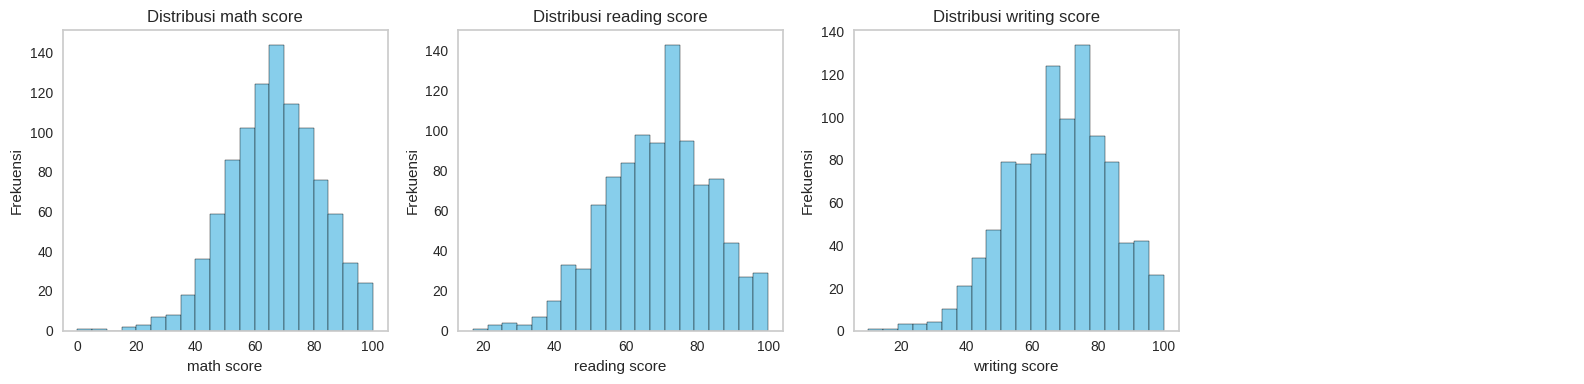

In [11]:
# Statistik deskriptif untuk data numerik
# print("\nStatistik deskriptif kolom numerik:")
# print(df.describe(include='number'))

# Visualisasi distribusi variabel numerikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Menentukan jumlah baris dan kolom untuk grid layout
n_cols = 4  # Jumlah grafik per baris
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Mengubah array axes menjadi 1D untuk iterasi

# Loop untuk setiap kolom numerik
for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frekuensi")
    axes[i].grid(False)

# Menonaktifkan axis yang tidak terpakai jika jumlah kolom tidak habis dibagi 4
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Menampilkan plot
plt.tight_layout()
plt.show()


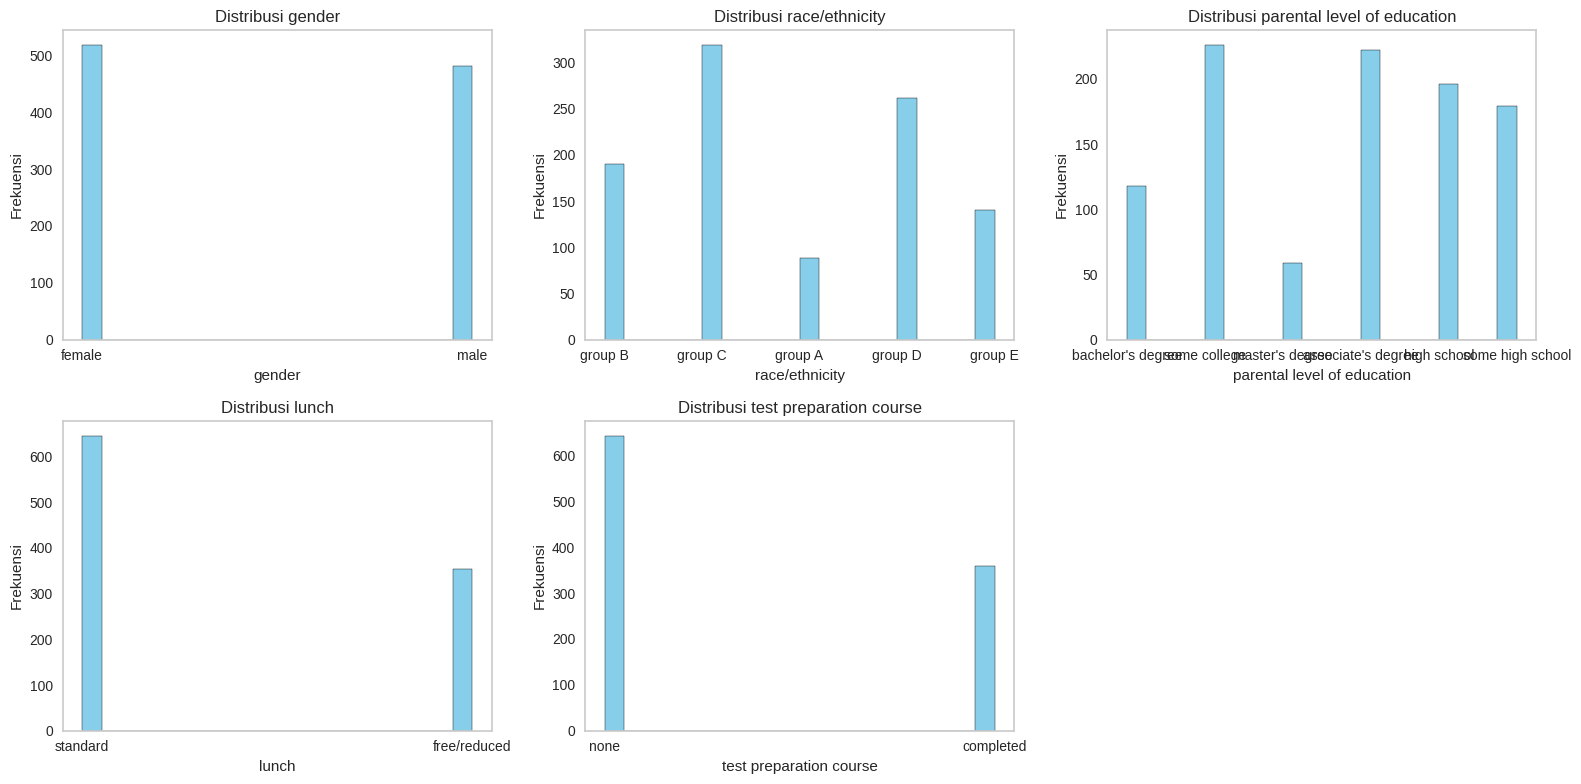

In [12]:
#Visualisasi distribusi variabel kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

n_cols = 3  # Jumlah grafik per baris
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Mengubah array axes menjadi 1D untuk iterasi

# Loop untuk setiap kolom numerik
for i, column in enumerate(categorical_columns):
    axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribusi {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frekuensi")
    axes[i].grid(False)

# Menonaktifkan axis yang tidak terpakai jika jumlah kolom tidak habis dibagi 4
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

# Menampilkan plot
plt.tight_layout()
plt.show()

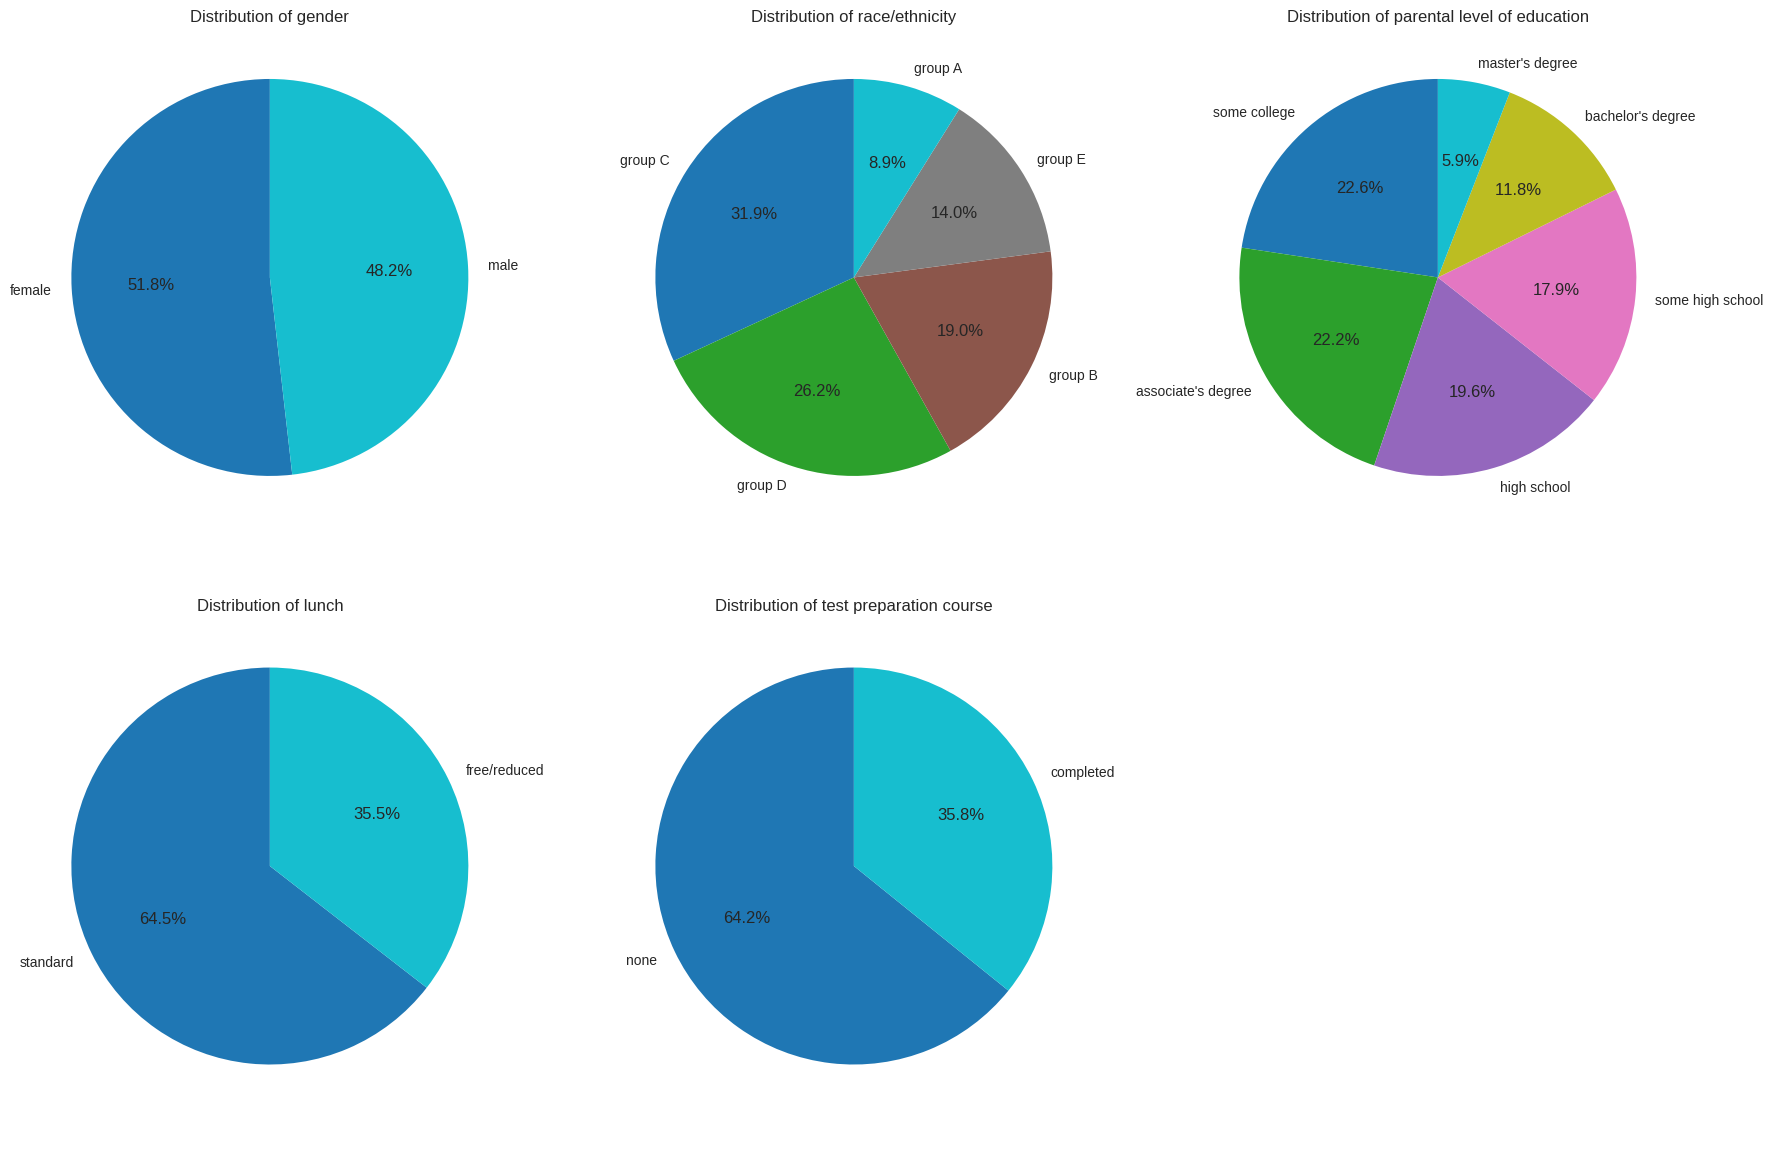

In [13]:
#Membuat pie chart untuk kolom kategorikal

# Membuat pie chart untuk setiap kolom kategorikal (3 per baris)
n_cols = 3
n_rows = int(np.ceil(len(categorical_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))
axes = axes.flatten()  # Mengubah array axes menjadi 1D untuk iterasi

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab10', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('')

# Menonaktifkan axes yang tidak terpakai
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

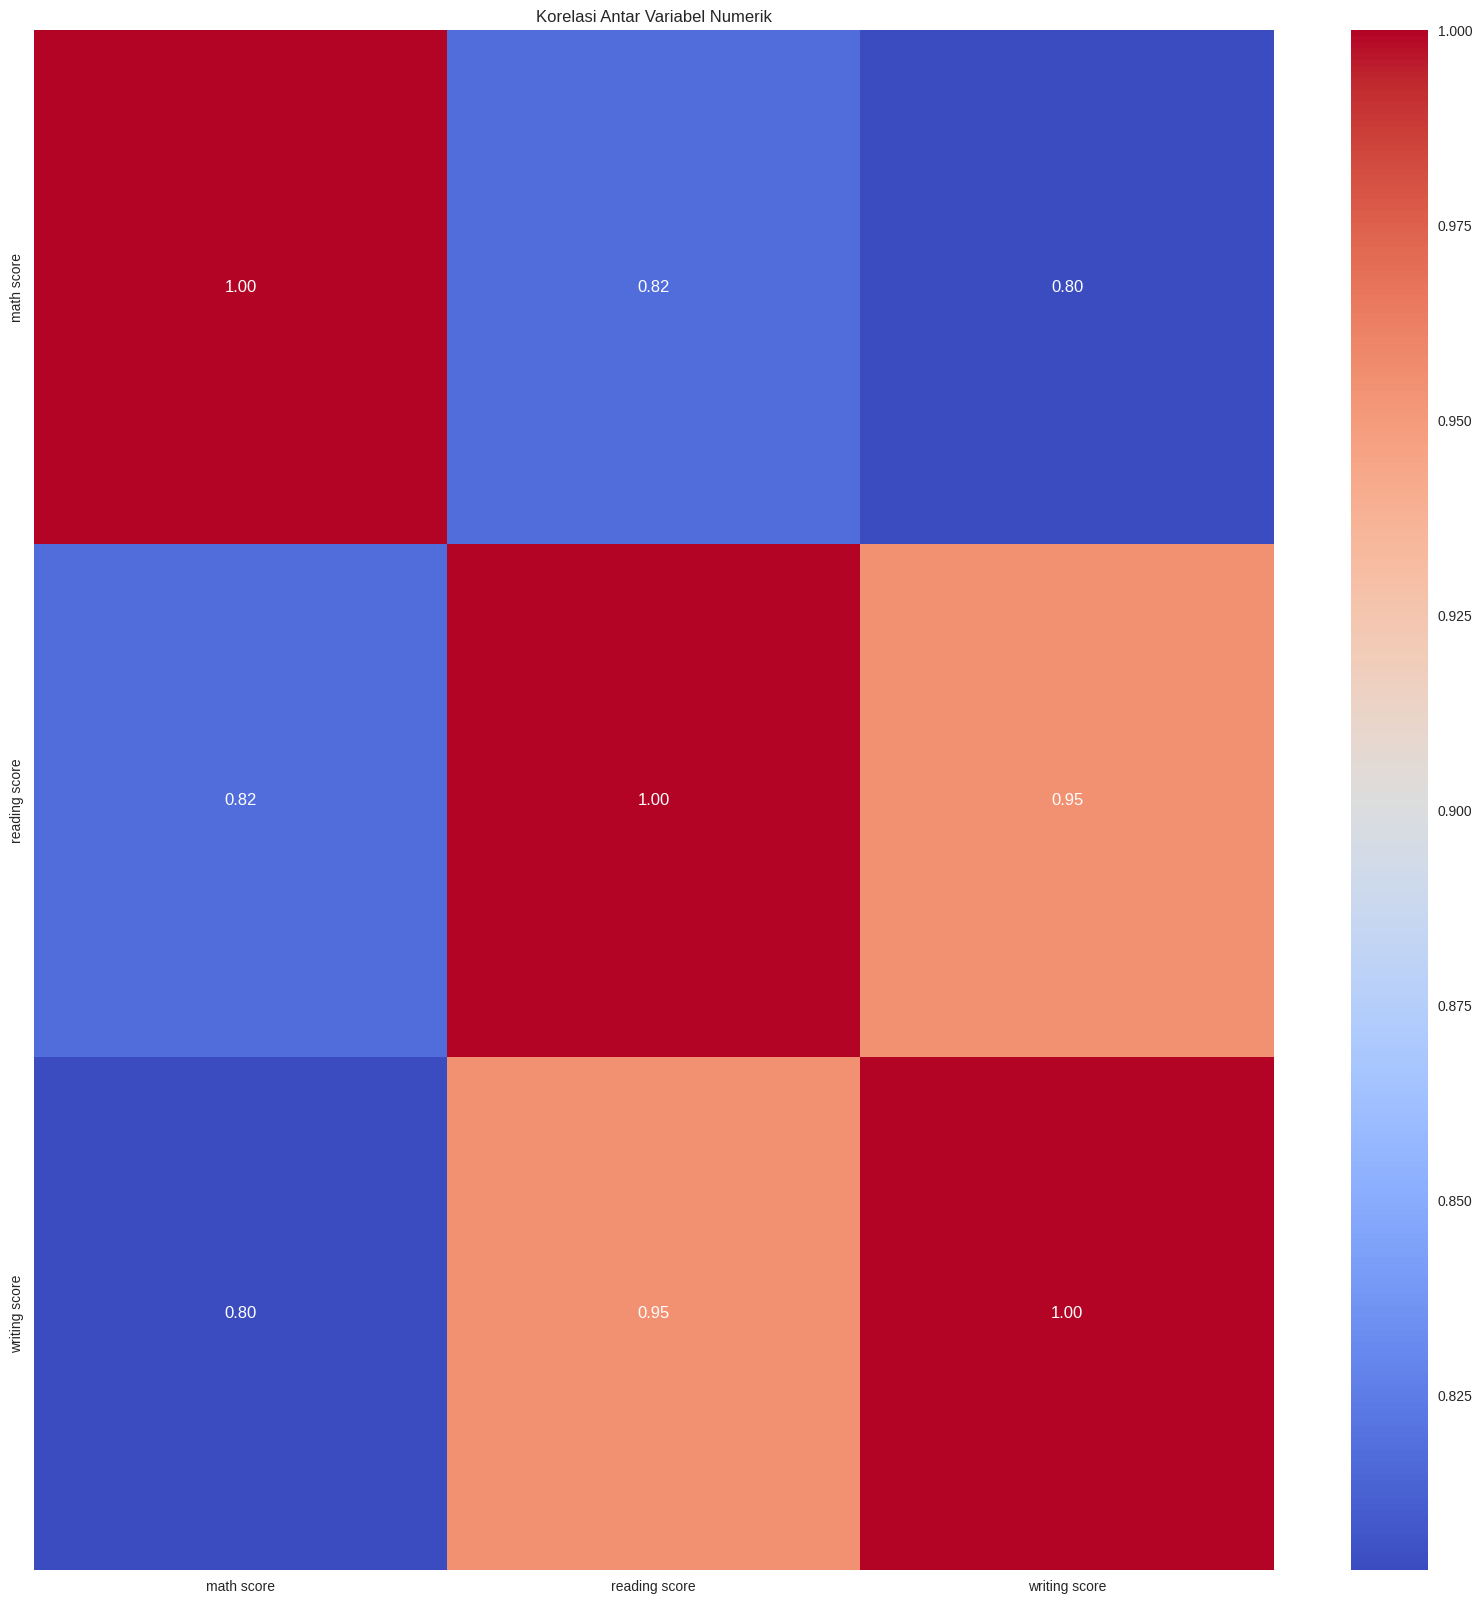

In [14]:
#Korelasi antar variabel numerik
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [15]:
#Mengecek data duplikat
df.duplicated().sum()

0

In [16]:
#Cek brp data yang unik di setiap kolom
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [17]:
#Encoding data kategorical dengan label Encoder
label_encoder = LabelEncoder()
df_encoded = df.copy()
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df_encoded.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [18]:
#Normalisasi data kategorical
scaler = StandardScaler()
numerical_features = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
# print(numerical_features)
df_encoded.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,-0.964625,-1.015044,-0.812640,0.741881,0.746748,0.390024,0.193999,0.391492
1,-0.964625,-0.150441,0.827953,0.741881,-1.339140,0.192076,1.427476,1.313269
2,-0.964625,-1.015044,0.281088,0.741881,0.746748,1.577711,1.770109,1.642475
3,1.036672,-1.879647,-1.359505,-1.347925,0.746748,-1.259543,-0.833899,-1.583744
4,1.036672,-0.150441,0.827953,0.741881,0.746748,0.653954,0.605158,0.457333


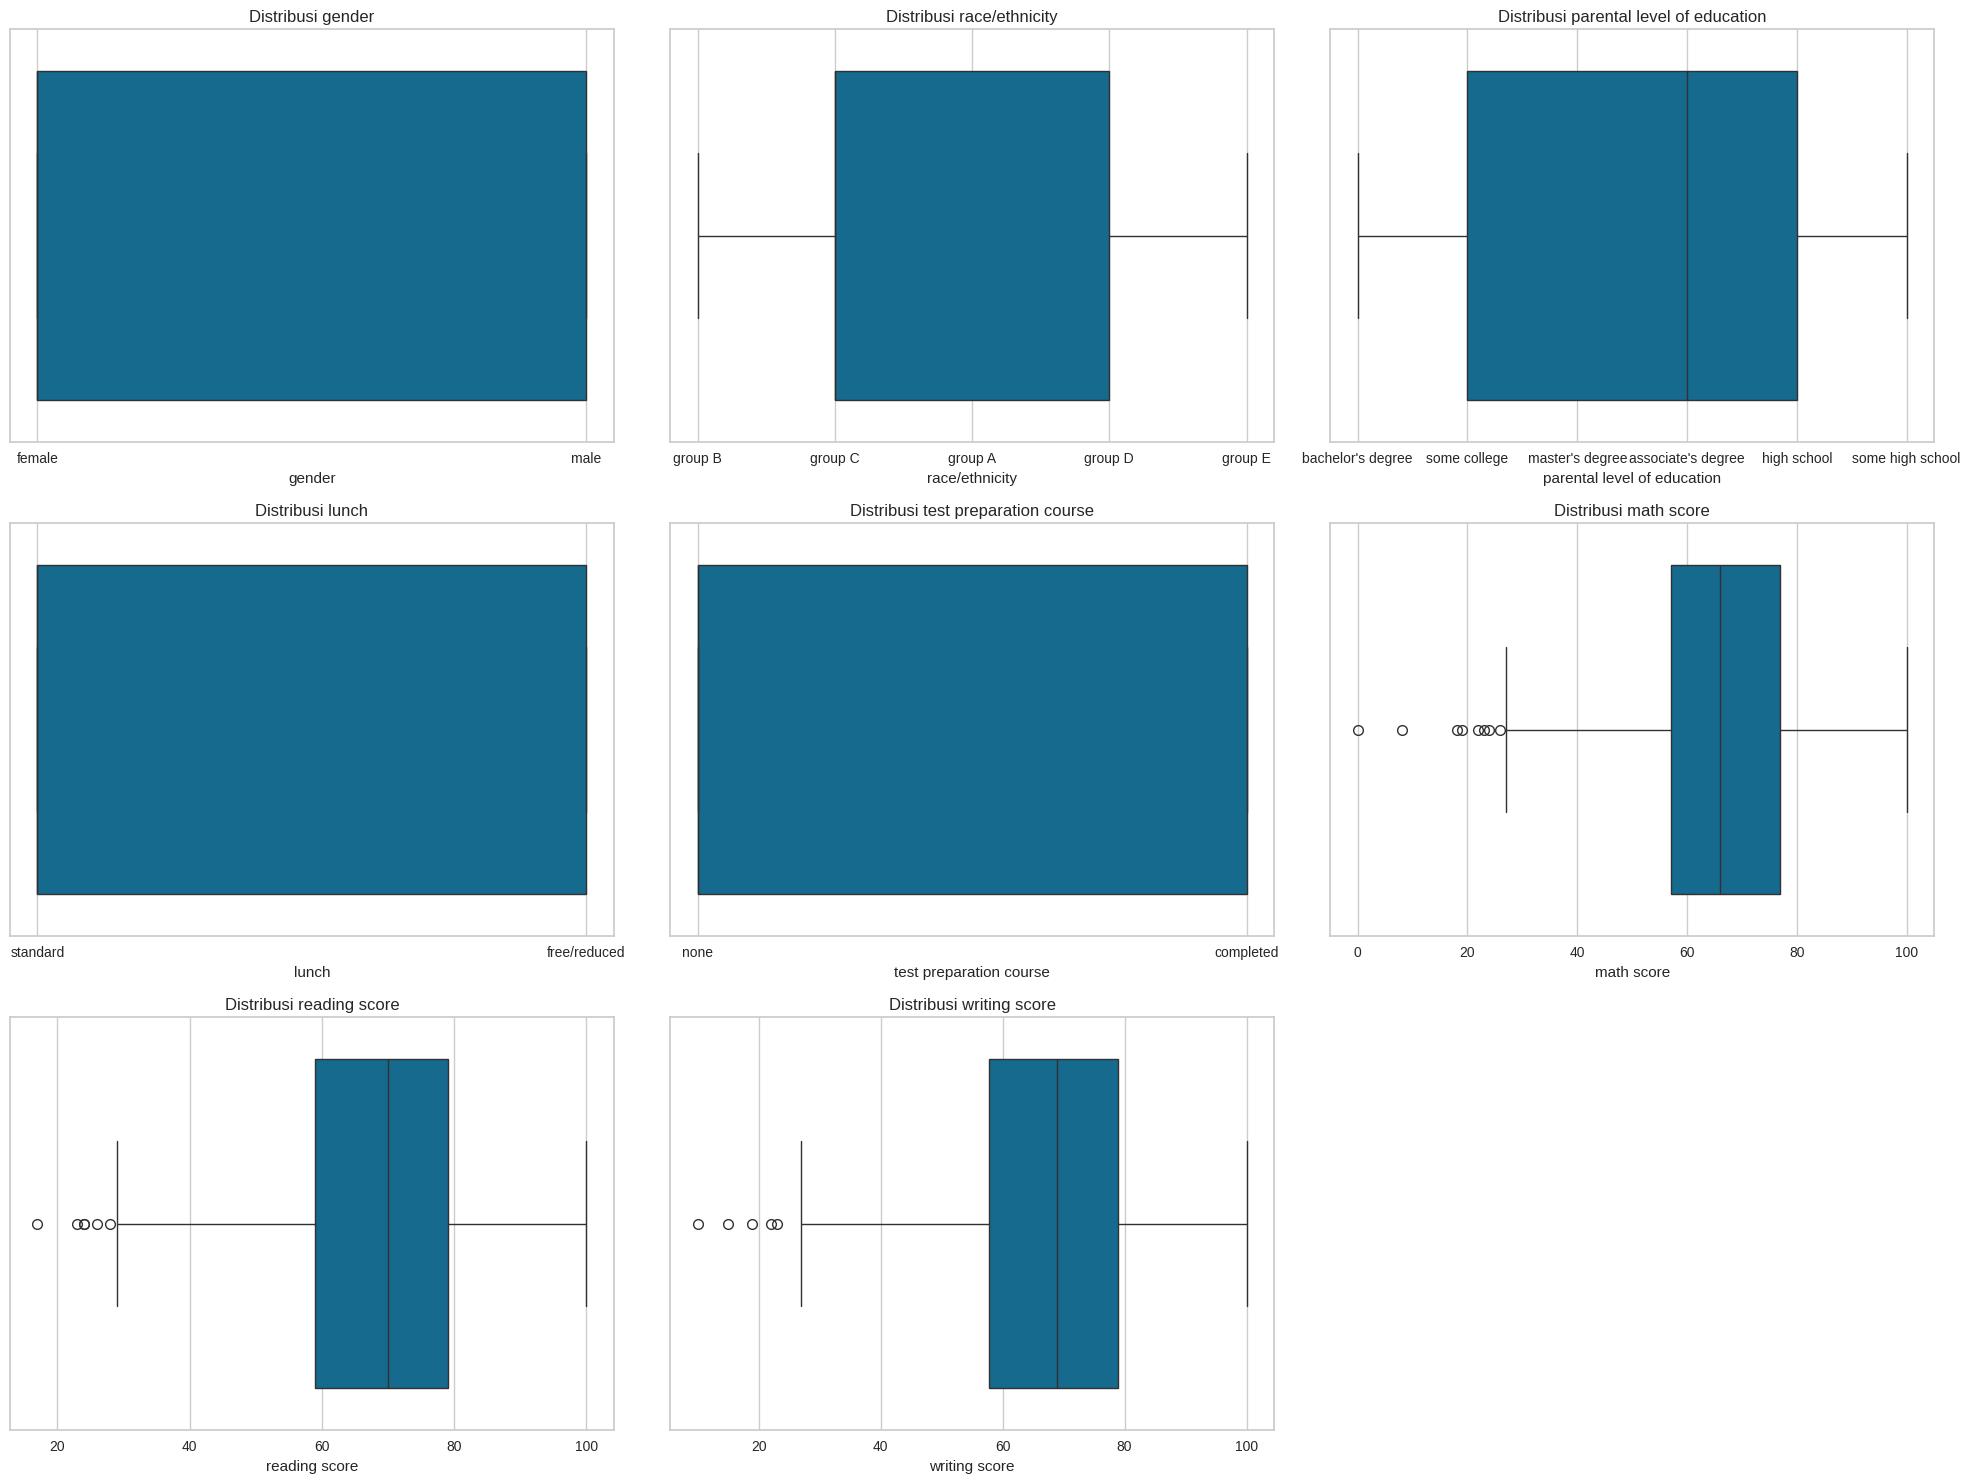

In [19]:
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # Hitung jumlah baris yang dibutuhkan

# Buat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Ubah array axes menjadi 1D untuk iterasi

# Loop untuk setiap kolom numerik
for i, col in enumerate(numerical_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

# Menonaktifkan axis yang tidak digunakan
for j in range(len(numerical_features), len(axes)):
    axes[j].axis('off')

# Atur tata letak
plt.tight_layout()
plt.show()

In [20]:
#Normalisasi dengan minmaxscaller
from sklearn.preprocessing import MinMaxScaler
df_encoded1 = df.copy()
categorical_columns = df_encoded1.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_encoded1[column] = label_encoder.fit_transform(df_encoded1[column])
scaler = MinMaxScaler()
df_encoded1[numerical_features] = scaler.fit_transform(df_encoded1[numerical_features])
df_encoded1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,0.25,0.2,1.0,1.0,0.72,0.662651,0.711111
1,0.0,0.50,0.8,1.0,0.0,0.69,0.879518,0.866667
2,0.0,0.25,0.6,1.0,1.0,0.90,0.939759,0.922222
3,1.0,0.00,0.0,0.0,1.0,0.47,0.481928,0.377778
4,1.0,0.50,0.8,1.0,1.0,0.76,0.734940,0.722222


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

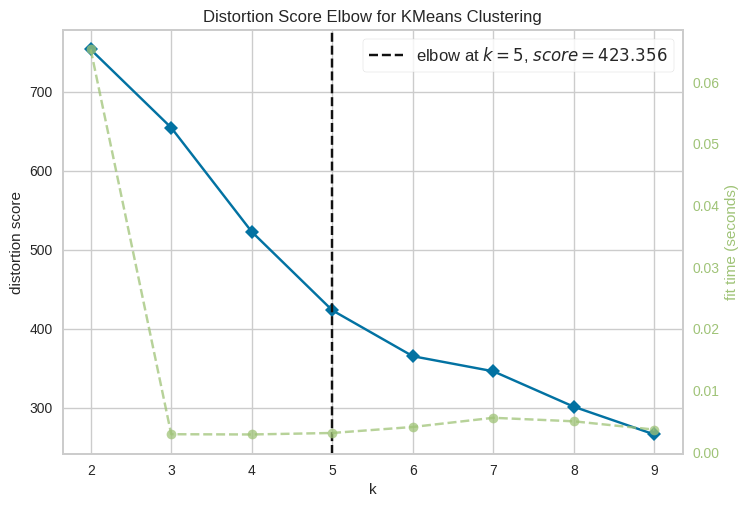

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#Menggunakan algoritma Kmeans
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_encoded1)
visualizer.show()

In [22]:
#Buat dengan metode kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_encoded1)
labels = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [23]:
#Evaluasi cluster
silhouette_avg = silhouette_score(df_encoded1, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3331091468989836


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [24]:
#Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)

rfe.fit(df_encoded1, labels)
selected_features = df_encoded.columns[rfe.support_]

print("Fitur yang dipilih:", selected_features)


Fitur yang dipilih: Index(['gender', 'lunch', 'test preparation course', 'reading score',
       'writing score'],
      dtype='object')


In [25]:
selected_features.tolist()

['gender',
 'lunch',
 'test preparation course',
 'reading score',
 'writing score']

In [26]:
df_selected = df_encoded1[selected_features]
df_selected.head()

,gender,lunch,test preparation course,reading score,writing score
0,0.0,1.0,1.0,0.662651,0.711111
1,0.0,1.0,0.0,0.879518,0.866667
2,0.0,1.0,1.0,0.939759,0.922222
3,1.0,0.0,1.0,0.481928,0.377778
4,1.0,1.0,1.0,0.734940,0.722222


In [28]:
n_clusters = 5  # Tentukan jumlah cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(df_selected)

# 4. Prediksi Cluster
clusters = kmeans.predict(df_selected)
# print("Hasil cluster untuk setiap data:", clusters)

# 5. Evaluasi dengan Silhouette Score
sil_score = silhouette_score(df_selected, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5679561587443718


Setelah menggunakan *feature selection*, *silhoutte score* meningkat menjadi **0.568**

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

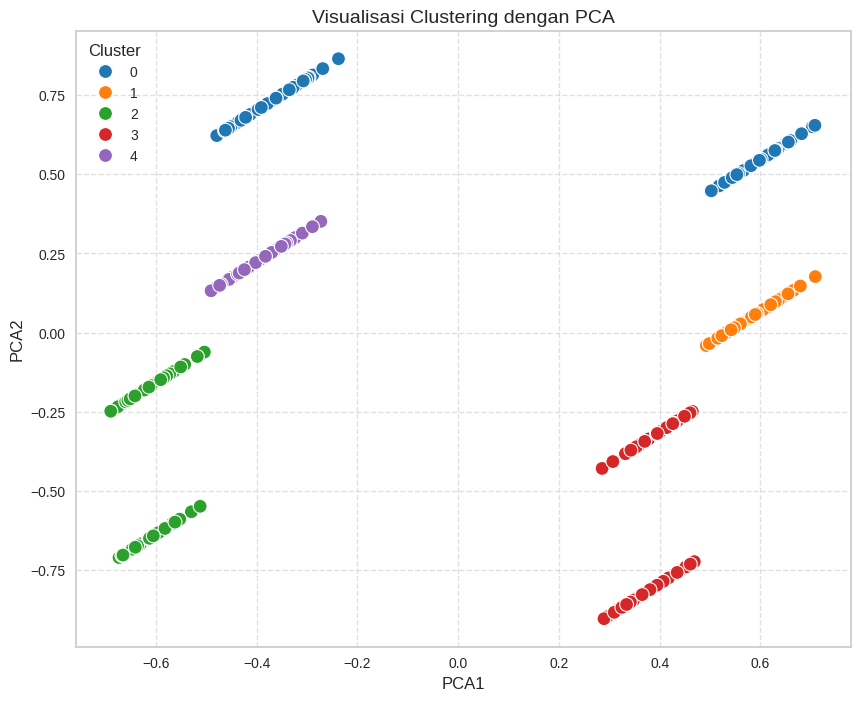

In [30]:
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected)

# Membuat DataFrame baru untuk hasil PCA dan label cluster
pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = labels

# Plot hasil clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='tab10', s=100
)
plt.title('Visualisasi Clustering dengan PCA', fontsize=14)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

<Figure size 1000x600 with 0 Axes>

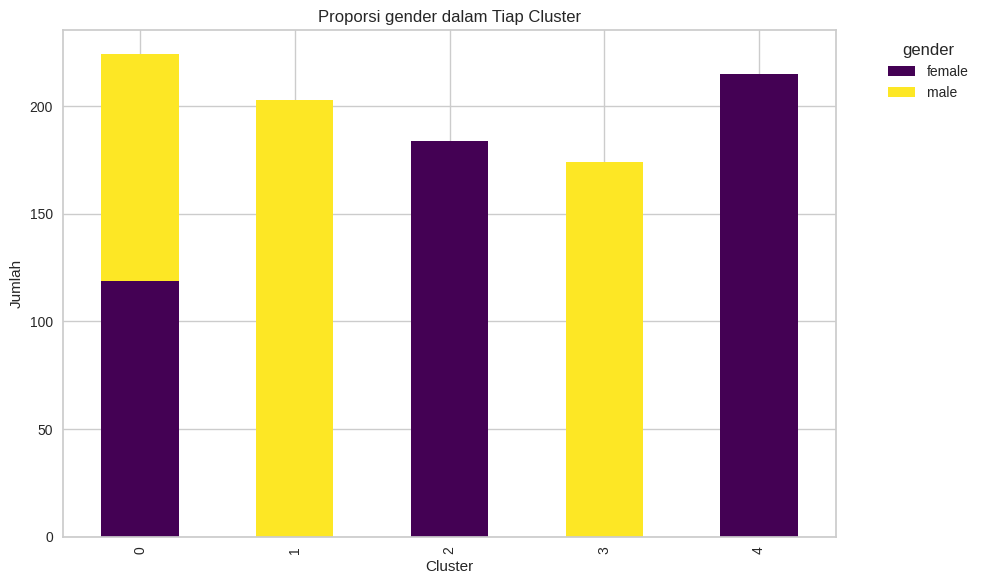

<Figure size 1000x600 with 0 Axes>

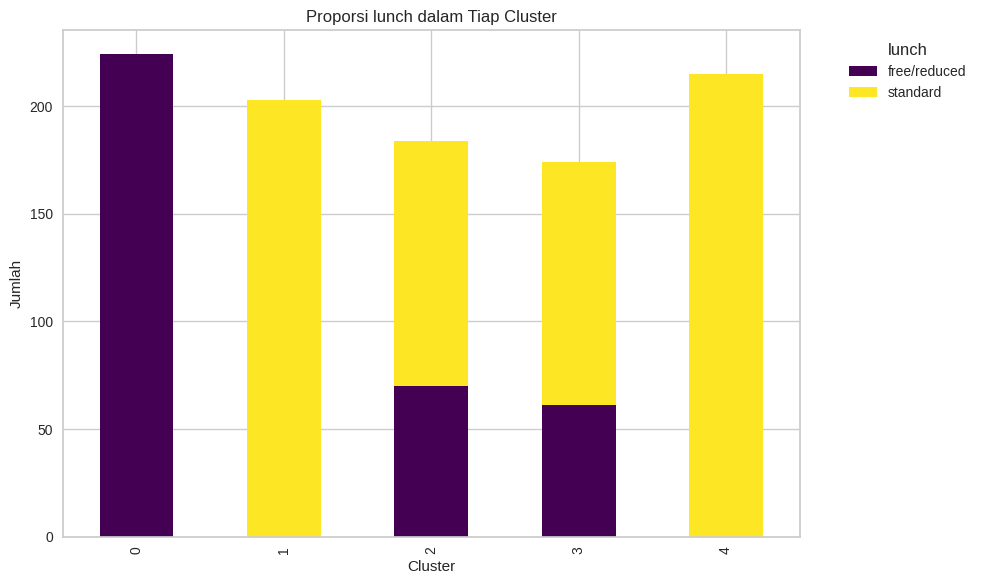

<Figure size 1000x600 with 0 Axes>

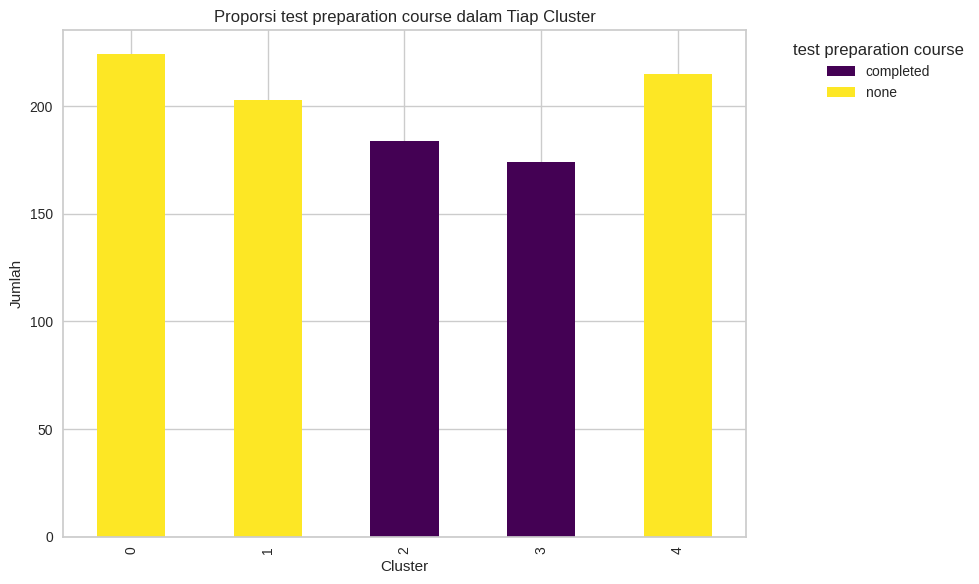

<ipython-input-47-4c544902b2eb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')


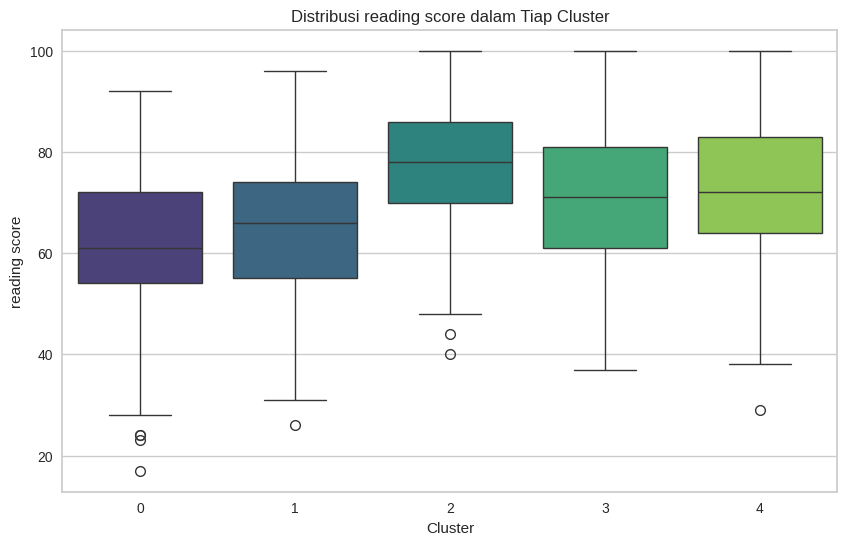

<ipython-input-47-4c544902b2eb>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')


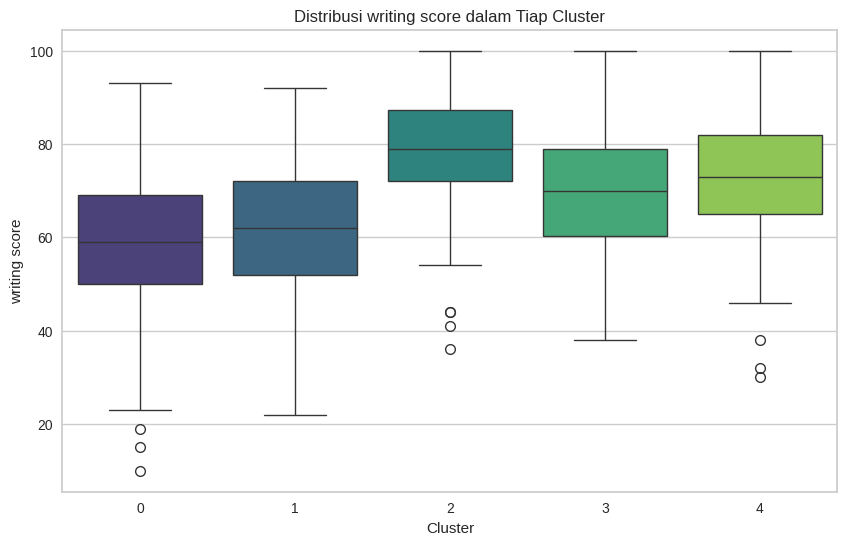

In [47]:
# Menambahkan label cluster ke dalam dataframe asli
df['Cluster'] = labels  # Menambahkan kolom hasil clustering

# Daftar kolom untuk dianalisis
categorical_columns = ['gender', 'lunch', 'test preparation course']
numerical_columns = ['reading score', 'writing score']

# Visualisasi kolom kategorikal dengan bar chart
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    cluster_categorical = df.groupby(['Cluster', column]).size().unstack(fill_value=0)
    cluster_categorical.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'Proporsi {column} dalam Tiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Jumlah')
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Visualisasi kolom numerikal dengan boxplot
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df, palette='viridis')
    plt.title(f'Distribusi {column} dalam Tiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()


In [49]:
# Menentukan kolom numerikal dan kategorikal
numerical_columns = ['reading score', 'writing score']
categorical_columns = ['gender', 'lunch', 'test preparation course']

# Menghitung rata-rata untuk kolom numerikal
numerical_avg = df.groupby('Cluster')[numerical_columns].mean()

# Menghitung proporsi untuk kolom kategorikal
categorical_avg = {}
for column in categorical_columns:
    categorical_avg[column] = df.groupby(['Cluster', column]).size().unstack(fill_value=0).apply(
        lambda x: x / x.sum(), axis=1
    )

# Menampilkan rata-rata untuk kolom numerikal
print("Rata-rata Kolom Numerikal per Cluster:")
print(numerical_avg)

# Menampilkan proporsi kategori dalam bentuk tabel
print("\nProporsi Kolom Kategorikal per Cluster:")
for column, prop in categorical_avg.items():
    print(f"\n{column}:")
    print(prop)

# # Visualisasi rata-rata numerikal per cluster
# numerical_avg.plot(kind='bar', figsize=(12, 6), colormap='viridis')
# plt.title('Rata-rata Numerikal per Cluster')
# plt.xlabel('Cluster')
# plt.ylabel('Rata-rata Nilai')
# plt.legend(title='Fitur', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# # Visualisasi proporsi kategorikal per cluster
# for column, prop in categorical_avg.items():
#     prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
#     plt.title(f'Proporsi {column} per Cluster')
#     plt.xlabel('Cluster')
#     plt.ylabel('Proporsi')
#     plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()


Rata-rata Kolom Numerikal per Cluster:
         reading score  writing score
Cluster                              
0            61.602679      58.736607
1            64.719212      61.906404
2            77.375000      78.793478
3            70.212644      69.793103
4            73.386047      72.967442

Proporsi Kolom Kategorikal per Cluster:

gender:
gender    female     male
Cluster                  
0        0.53125  0.46875
1        0.00000  1.00000
2        1.00000  0.00000
3        0.00000  1.00000
4        1.00000  0.00000

lunch:
lunch    free/reduced  standard
Cluster                        
0            1.000000  0.000000
1            0.000000  1.000000
2            0.380435  0.619565
3            0.350575  0.649425
4            0.000000  1.000000

test preparation course:
test preparation course  completed  none
Cluster                                 
0                              0.0   1.0
1                              0.0   1.0
2                              1.0   0.0


# **Interpretasi Hasil Clustering**

Berikut adalah analisis karakteristik masing-masing cluster berdasarkan rata-rata kolom numerikal dan proporsi kolom kategorikal:  

## **Cluster 0**
- **Karakteristik:**  
  - *Reading score*: 61.60 | *Writing score*: 58.74  
  - Gender: 53% *female*, 47% *male*  
  - Lunch: 100% berasal dari *free/reduced lunch*  
  - Test preparation course: 100% *none* (tidak ada yang menyelesaikan persiapan tes)  
- **Kesimpulan:**  
  Cluster ini mewakili siswa dengan keterbatasan ekonomi, performa akademik rendah, dan tanpa persiapan tes.  

---

## **Cluster 1**
- **Karakteristik:**  
  - *Reading score*: 64.72 | *Writing score*: 61.91  
  - Gender: 100% *male*  
  - Lunch: 100% berasal dari *standard lunch*  
  - Test preparation course: 100% *none*  
- **Kesimpulan:**  
  Cluster ini mewakili siswa laki-laki dengan latar belakang ekonomi lebih baik tetapi performa akademik rata-rata, tanpa persiapan tes.  

---

## **Cluster 2**
- **Karakteristik:**  
  - *Reading score*: 77.38 | *Writing score*: 78.79  
  - Gender: 100% *female*  
  - Lunch: 38% *free/reduced lunch*, 62% *standard lunch*  
  - Test preparation course: 100% *completed*  
- **Kesimpulan:**  
  Cluster ini mewakili siswa perempuan yang memiliki performa akademik tinggi, berasal dari latar belakang ekonomi beragam, dan telah mempersiapkan diri dengan baik melalui program persiapan tes.  

---

## **Cluster 3**
- **Karakteristik:**  
  - *Reading score*: 70.21 | *Writing score*: 69.79  
  - Gender: 100% *male*  
  - Lunch: 35% *free/reduced lunch*, 65% *standard lunch*  
  - Test preparation course: 100% *completed*  
- **Kesimpulan:**  
  Cluster ini mewakili siswa laki-laki dengan performa akademik cukup baik, latar belakang ekonomi beragam, dan telah mempersiapkan diri melalui persiapan tes.  

---

## **Cluster 4**
- **Karakteristik:**  
  - *Reading score*: 73.39 | *Writing score*: 72.97  
  - Gender: 100% *female*  
  - Lunch: 100% berasal dari *standard lunch*  
  - Test preparation course: 100% *none*  
- **Kesimpulan:**  
  Cluster ini mewakili siswa perempuan dengan latar belakang ekonomi lebih baik, performa akademik cukup tinggi, meskipun tidak mengikuti persiapan tes.  

---

## **Kesimpulan Umum**
1. **Cluster 2** memiliki performa akademik terbaik dengan skor tinggi dan partisipasi penuh dalam persiapan tes.  
2. Faktor *lunch* dan *test preparation course* memiliki pengaruh signifikan terhadap performa akademik. Siswa dengan latar belakang *standard lunch* dan yang menyelesaikan persiapan tes cenderung memiliki skor lebih tinggi.  
3. Performa siswa perempuan secara umum lebih tinggi dibandingkan siswa laki-laki dalam analisis ini.  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [50]:
# Menambahkan label cluster ke dalam dataframe
df_clustered = df_selected.copy()
df_clustered['Cluster'] = labels

# Menyimpan dataframe ke dalam file CSV
output_file = 'clustered_data.csv'
df_clustered.to_csv(output_file, index=False)

print(f"File hasil clustering telah disimpan dengan nama '{output_file}'")


File hasil clustering telah disimpan dengan nama 'clustered_data.csv'
